# Text Classification Using Naive Bayes Classifier

## Task 1

Open the data. Find out how many spam and non-spam emails there are. Visualize the resulting ratios in a suitable way.

In [74]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn import metrics
from sklearn import model_selection
from sklearn import naive_bayes

email_data = pd.read_csv('../../data/Task9_spam_or_not_spam.csv')
print('Dataset size:', email_data.shape)

Dataset size: (3000, 2)


In [42]:
class_frequencies = email_data['label'].value_counts()

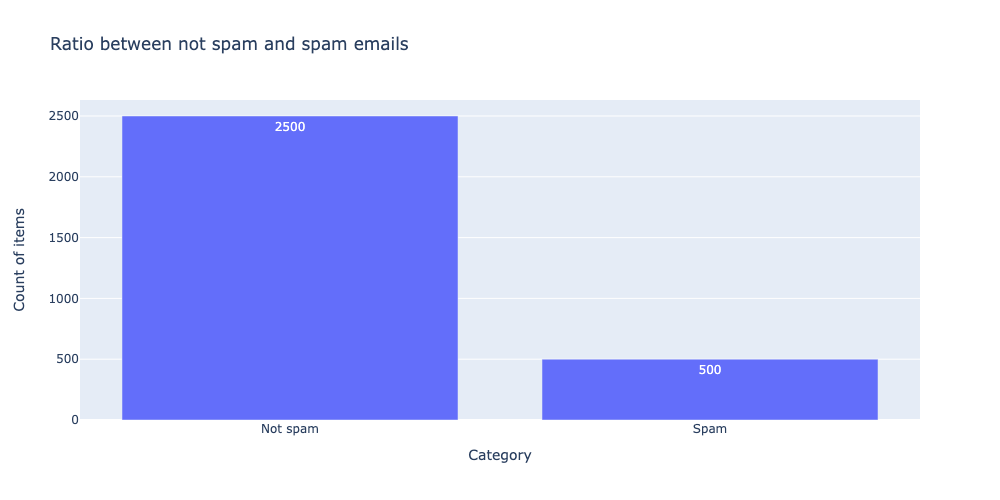

In [43]:
fig = px.bar(
    class_frequencies,
    width=1000,
    height=500,
    title='Ratio between not spam and spam emails',
    text_auto=True
).update_layout(
    xaxis_title='Category',
    yaxis_title='Count of items',
    showlegend=False,
    xaxis_tickvals=[0, 1],
    xaxis_ticktext=['Not spam', 'Spam']
)
fig.show('png')

## Task 2

You need to preprocess your data and convert it into vector form. Let's load the necessary module:

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

Replace all empty rows and rows consisting of spaces with NaNs in the data. Then remove all rows from the data that contain missing values.

In [45]:
email_data['email'] = email_data['email'].apply(lambda x: np.nan if str(x).strip() == '' else x)

print('Number of empty emails:')
print(email_data.isnull().sum())

email_data = email_data.dropna()

print('Dataset size:', email_data.shape)

Number of empty emails:
email    3
label    0
dtype: int64
Dataset size: (2997, 2)


We convert the data into vector form:

In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data["email"])

Determine how many features there are in our dataset now:

In [50]:
print('The number of features in the datase:', X.shape[1])

The number of features in the datase: 34116


## Task 3

Define the target variable and features:

In [53]:
y = email_data['label']

Divide the sample into training and testing using stratified partitioning (set the `stratify` parameter to the value of the response vector y), take the test sample size (`test_size`) as 0.25, define the `random_state` parameter with the value 42:

In [67]:
test_size = 0.25
random_state = 42

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    test_size=test_size, 
    random_state=random_state
)

print('Label ratio in the training dataset:')
print(y_train.value_counts(normalize=True))

print('Label ratio in the test dataset:')
print(y_test.value_counts(normalize=True))

Label ratio in the training dataset:
label
0    0.834001
1    0.165999
Name: proportion, dtype: float64
Label ratio in the test dataset:
label
0    0.834667
1    0.165333
Name: proportion, dtype: float64


For a test calculate the mean value of the target variable based on the test sample:

In [68]:
print('Mean value of the target variable on the test sample:', y_test.mean())

Mean value of the target variable on the test sample: 0.16533333333333333


## Task 4

Determine and train a suitable algorithm with parameter alpha = 0.01

In [73]:
alpha = 0.01
compl_nb = naive_bayes.ComplementNB(alpha=alpha)
compl_nb.fit(X_train, y_train)
y_pred = compl_nb.predict(X_test)

Evaluate the result in terms of all metrics known to you (at least three):

In [76]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       626
           1       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750



Draw the ROC curve:

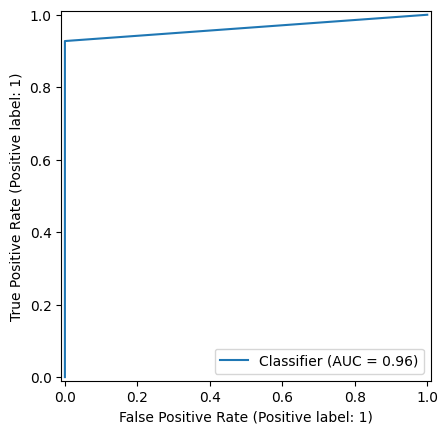

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

> **Conclusion:**
> 
> The AUC (Area Under the ROC Curve) value of 0.96 indicates that the classification model has a good performance.

## Task 5

Try several alpha values ​​using cross-validation. Assess whether the classification quality depends on this parameter.

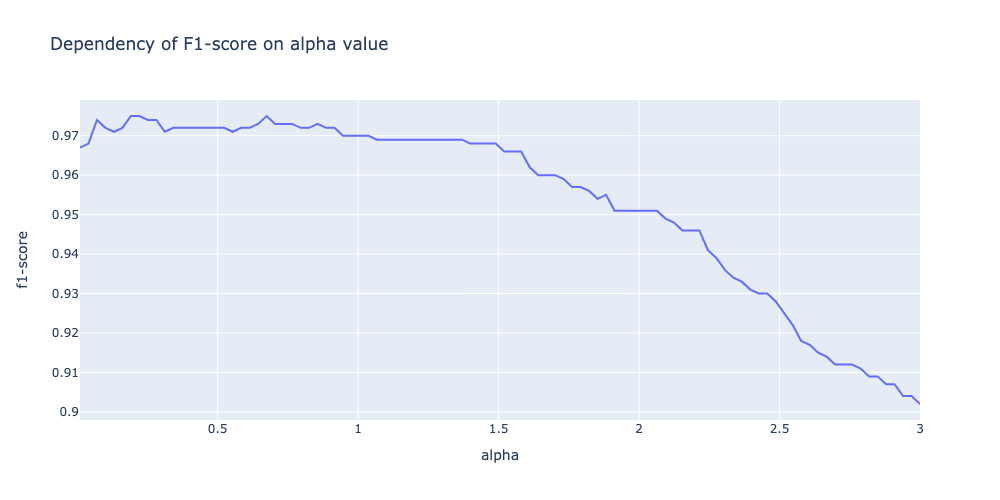

Highest f1-score and its alpha value:


alpha       0.674444
f1-score    0.975000
Name: 22, dtype: float64

In [110]:
alphas = np.linspace(0.01, 3, 100)
results = []

for alpha in alphas:    
    compl_nb = naive_bayes.ComplementNB(alpha=alpha)

    kf = model_selection.KFold(n_splits=5)

    cv_metrics = model_selection.cross_validate(
        estimator=compl_nb,
        X=X_train,
        y=y_train,
        cv=kf,
        scoring='f1',
        return_train_score=True
    )
    results.append([alpha, cv_metrics['test_score'].mean().round(3)])

results_df = pd.DataFrame({
    'alpha': list(zip(*results))[0],
    'f1-score': list(zip(*results))[1]
})

fig = px.line(
    results_df, 
    x='alpha', 
    y='f1-score',
    width=1000,
    height=500,
    title='Dependency of F1-score on alpha value'
)
fig.show('png')

print('Highest f1-score and its alpha value:')
results_df.sort_values(by='f1-score', ascending=False).iloc[0]


> **Conclusion:**
> 
> Based on the chart above the classification quality is more or less stable for the alpha values in the range of [0, 1.5] and degrades for alpha > 1.5.